In [1]:
from keras.datasets import imdb
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import MaxPooling1D, Conv1D, Dense, Flatten, Dropout, Embedding
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

2023-05-07 16:17:20.579084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
edges = pd.read_csv("elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
features = pd.read_csv("elliptic_bitcoin_dataset/elliptic_txs_features.csv",header=None)
classes = pd.read_csv("elliptic_bitcoin_dataset/elliptic_txs_classes.csv")

In [3]:
features.rename(columns = {0:'txId1'}, inplace = True)
features = pd.merge(features, edges.groupby('txId1').count(), on="txId1", how="left")
features.head()

,txId1,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,txId2
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1.0
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1.0
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,2.0
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,1.0
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,8.0


In [4]:
y = classes[classes['class'] != 'unknown']
x = features[features.iloc[:, 0].isin(y['txId'])]
x = x.iloc[:, 2:]
x.fillna(0, inplace=True)
y['class']=y['class'].apply(lambda x: x=='1')
y = y.iloc[:, 1]
x_train, x_test, y_train, y_test= train_test_split(x,y)
y_train.head()

/var/folders/kx/8bjcrvzs4mg17czn92p9mw340000gp/T/ipykernel_17612/595410248.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class']=y['class'].apply(lambda x: x=='1')


110721    False
57061     False
174113    False
202237    False
42303     False
Name: class, dtype: bool

In [5]:
x_train['txId2']=x_train['txId2'].apply(lambda x: np.log(1+x))
x_train.head()

,2,3,4,5,6,7,8,9,10,11,...,158,159,160,161,162,163,164,165,166,txId2
110721,-0.172163,-0.169602,0.463609,-0.12197,-0.043875,-0.113002,-0.061584,-0.162806,-0.168633,-0.049707,...,-0.613614,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,0.693147
57061,-0.172954,-0.185703,-0.646376,-0.12197,-0.063725,-0.113002,-0.061584,-0.163616,-0.169431,-0.049707,...,-0.563154,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0.000000
174113,-0.046835,-0.055879,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.034574,-0.042198,-0.049707,...,0.017130,-0.979074,-0.978556,0.018279,0.335448,0.891428,0.850093,-1.760926,-1.760984,1.098612
202237,-0.006322,-0.123405,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,0.006875,-0.001330,-0.049707,...,2.596872,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,0.693147
42303,0.005830,-0.132897,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,0.019307,0.010929,-0.049707,...,-0.556847,-0.979074,-0.978556,0.018279,-0.049041,-0.038193,-0.011377,1.519700,1.521399,0.693147


(array([4.6556e+04, 4.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,  47.2,  94.4, 141.6, 188.8, 236. , 283.2, 330.4, 377.6,
        424.8, 472. ]),
 <BarContainer object of 10 artists>)

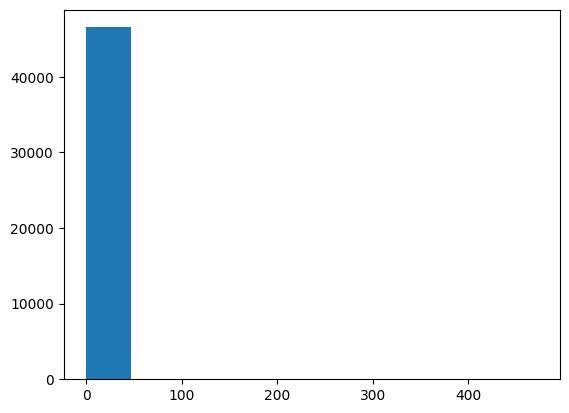

In [6]:
plt.hist(x['txId2'])

(array([8.8280e+03, 2.4635e+04, 1.0130e+03, 3.0300e+02, 1.1400e+02,
        2.4000e+01, 4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.        , 0.61590954, 1.23181908, 1.84772862, 2.46363816,
        3.07954769, 3.69545723, 4.31136677, 4.92727631, 5.54318585,
        6.15909539]),
 <BarContainer object of 10 artists>)

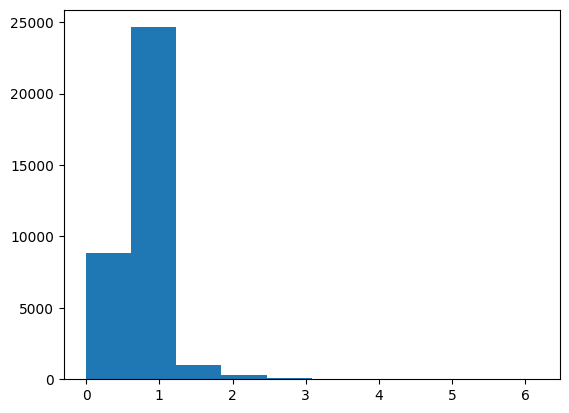

In [7]:
plt.hist(x_train['txId2'])

In [8]:
model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(166, 1)))
model.add(MaxPooling1D(pool_size=4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/5
1092/1092 [==============================] - 9s 8ms/step - loss: 0.1588 - accuracy: 0.9438 - val_loss: 0.1115 - val_accuracy: 0.9621
Epoch 2/5
1092/1092 [==============================] - 9s 8ms/step - loss: 0.1229 - accuracy: 0.9630 - val_loss: 0.1015 - val_accuracy: 0.9681
Epoch 3/5
1092/1092 [==============================] - 10s 9ms/step - loss: 0.1136 - accuracy: 0.9685 - val_loss: 0.0911 - val_accuracy: 0.9759
Epoch 4/5
1092/1092 [==============================] - 11s 10ms/step - loss: 0.1073 - accuracy: 0.9699 - val_loss: 0.0870 - val_accuracy: 0.9765
Epoch 5/5
364/364 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9763


In [9]:
loss, accuracy = model.evaluate(x_test, y_test)

364/364 [==============================] - 1s 3ms/step - loss: 0.0862 - accuracy: 0.9763


In [10]:
y = classes[classes['class'] == 'unknown']
x = features[features.iloc[:, 0].isin(y['txId'])]
x = x.iloc[:, 2:]
x.fillna(0, inplace=True)
x['txId2']=x['txId2'].apply(lambda x: np.log(1+x))
result=model.predict(x)

4913/4913 [==============================] - 12s 2ms/step


In [11]:
res=np.round(result)

In [12]:
unique, counts = np.unique(res, return_counts=True)
dict(zip(unique, counts))

{0.0: 148590, 1.0: 8615}

In [13]:
classes_illicit = classes[classes['class'] == '1']
classes_licit = classes[classes['class'] == '2']
classes_illicit.count()/classes_licit.count()

txId     0.108165
class    0.108165
dtype: float64

In [14]:
counts[1]/counts[0]

0.05797832963187294